In [1]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.5 MB/s eta 0:00:00


In [2]:
!pip install -q youtube_transcript_api

In [3]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi


In [6]:
youtube_video = "https://www.youtube.com/watch?v=lNMSqxQtO0w" #video id is what we are using to distinguish the video ie. string right after "="

In [7]:
video_id = youtube_video.split("=")[1]

In [8]:
video_id

'lNMSqxQtO0w'

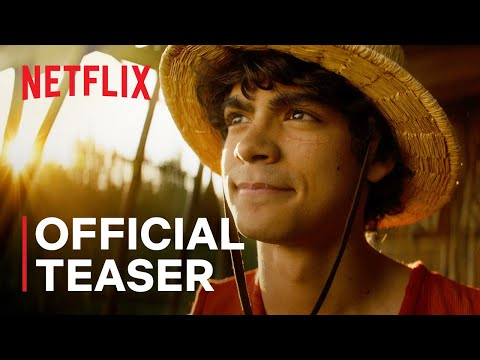

In [9]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [14]:
transcript = YouTubeTranscriptApi.get_transcript(video_id, languages=['en-US']) #change language to whatever transcript is available.


In [15]:
transcript[0:5] #we have successfully extracted the transcript.

[{'text': 'Ever since I was a kid…', 'start': 5.714, 'duration': 1.543},
 {'text': 'the sea has been calling.', 'start': 10.469, 'duration': 1.626},
 {'text': 'So,', 'start': 13.263, 'duration': 1.001},
 {'text': "I'm setting out to follow my dream.",
  'start': 14.89,
  'duration': 1.877},
 {'text': "I'm gonna be King of the Pirates.",
  'start': 18.727,
  'duration': 2.211}]

In [16]:
result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

593


In [17]:
summarizer = pipeline('summarization') #here we are using pipeline to summarize the transcript

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [18]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

#print(summarized_text) #we break the entire transcript into managable chunks to make it easy to summarize.

input text 
 Ever since I was a kid… the sea has been calling. So, I'm setting out to follow my dream. I'm gonna be King of the Pirates. All I need is a loyal crew. And I think, together, we'd make a good team. We're heading up to the Grand Line. A treacherous stretch of ocean. With bigger islands, bigger pirates. -Careful with that.
-I don't work for you. I'm sensing a little bit of tension
amongst the crew. -Not a crew.
-Not a crew. We haven't sailed together
for very long, but I know we've got
each other's backs. Gum Gum… Pistol! All great fighters
call out their finishing moves. No, they don't.
Summarized text
 The Pirates are heading up to the Grand Line - a treacherous stretch of ocean with bigger islands and bigger pirates . The crew are not a crew. They are just a pirates, not a pirates. We haven't sailed together for very long, but I know we've got each other's backs .
[" The Pirates are heading up to the Grand Line - a treacherous stretch of ocean with bigger islands and bigg

In [19]:
len(str(summarized_text))

272

In [20]:
str(summarized_text) #our final output

'[" The Pirates are heading up to the Grand Line - a treacherous stretch of ocean with bigger islands and bigger pirates . The crew are not a crew. They are just a pirates, not a pirates. We haven\'t sailed together for very long, but I know we\'ve got each other\'s backs ."]'